In [250]:
# TODO: import needed libraries
import pandas as pd
import numpy as np
import nltk
import re

##from nltk I need
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

##for stopworlds
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")

#to transform to token
from nltk.tokenize import word_tokenize


##fromlemmatization & stem
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

##for tagging
from nltk import pos_tag
from nltk.corpus import wordnet

##PorterStemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Librairies for modelling with Gensim
from gensim.models import TfidfModel
from gensim.models import LdaModel
from gensim.models import LsiModel


from gensim.corpora import Dictionary
from gensim.models import LsiModel
from pprint import pprint

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [251]:
##Import data
data = pd.read_csv('Description_diseases_raw_1.csv', encoding_errors="ignore", delimiter=";")

# EDA : explore data and preprocess NLP

Exploring dataset by overlooking content in columns

In [252]:
data

,Disease,Overview,What,Causes,Clinical,Treatment
0,Melanocytic nevi,Melanocytic nevus is the medical term for a mo...,Melanocytic nevi are benign tumors that that a...,Melanocytic nevi are a reflection of genetic f...,Tan to dark brown pale pink and occasionally...,The majority of melanocytic nevi do not requir...
1,Melanoma,Too much time in the sun or atanning booth in ...,As with other types of skin cancer exposure t...,Family history of melanoma. Personal history o...,The most important warning sign for melanoma i...,Treatment options are based on the stage of th...
2,Benign keratosis-like lesions,Seborrheic keratosis is the most common type o...,Seborrheic keratosis is a type of benign (non-...,Doctors aren?t sure what causes seborrheic ker...,People with seborrheic keratosis may notice a ...,In most cases no treatment is necessary for s...
3,basal cell carcinomas,If you finda suspicious spot or mole on your s...,Basal cell carcinoma is a type of skin cancer ...,People at the highest risk for basal cell carc...,A basal cell carcinoma is a stubborn persiste...,Most of the time basal cell carcinoma remains...
4,actinic keratosis,Unlike most skin conditions caused by the sun ...,Actinic keratoses are often referred to in the...,caused by the accumulation of sun exposure ove...,Patients will often notice a rough spot that i...,Topical destruction: AK primarily affects the ...
5,Dermatofibroma,A dermatofibroma is a commonbenignfibrousnodul...,It is not clear if dermatofibroma is a reactiv...,It is not clear if dermatofibroma is a reactiv...,A dermatofibroma usually presents as a solitar...,A dermatofibroma is harmless and seldom causes...


In [253]:
##data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    6 non-null      object
 1   Overview   6 non-null      object
 2   What       6 non-null      object
 3   Causes     6 non-null      object
 4   Clinical   6 non-null      object
 5   Treatment  6 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes


In [254]:
##Data variable response
data["Disease"].value_counts()

Disease
Melanocytic nevi                 1
Melanoma                         1
Benign keratosis-like lesions    1
basal cell carcinomas            1
actinic keratosis                1
Dermatofibroma                   1
Name: count, dtype: int64

# NLP on all the column merge

In [255]:
##Data subset
var = ["Disease"]
data_subset =  data[var]
data_subset

,Disease
0,Melanocytic nevi
1,Melanoma
2,Benign keratosis-like lesions
3,basal cell carcinomas
4,actinic keratosis
5,Dermatofibroma


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    6 non-null      object
 1   Overview   6 non-null      object
 2   What       6 non-null      object
 3   Causes     6 non-null      object
 4   Clinical   6 non-null      object
 5   Treatment  6 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes


In [256]:
##Merge to one column
data_subset["Description_all"] = data["Overview"] + " What : " + data["What"] + " Causes : " + data["Causes"] + " Clinical : " + data["Clinical"] + "Treatment : " + data["Treatment"]
data_subset

/tmp/ipykernel_26530/2327307461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset["Description_all"] = data["Overview"] + " What : " + data["What"] + " Causes : " + data["Causes"] + " Clinical : " + data["Clinical"] + "Treatment : " + data["Treatment"]


,Disease,Description_all
0,Melanocytic nevi,Melanocytic nevus is the medical term for a mo...
1,Melanoma,Too much time in the sun or atanning booth in ...
2,Benign keratosis-like lesions,Seborrheic keratosis is the most common type o...
3,basal cell carcinomas,If you finda suspicious spot or mole on your s...
4,actinic keratosis,Unlike most skin conditions caused by the sun ...
5,Dermatofibroma,A dermatofibroma is a commonbenignfibrousnodul...


In [257]:
###Functions to tag word for Lemmenizing
def get_wordnet_pos(pos_tag):
    output = np.asarray(pos_tag)
    for i in range(len(pos_tag)):
        if pos_tag[i][1].startswith('J'):
            output[i][1] = wordnet.ADJ
        elif pos_tag[i][1].startswith('V'):
            output[i][1] = wordnet.VERB
        elif pos_tag[i][1].startswith('R'):
            output[i][1] = wordnet.ADV
        else:
            output[i][1] = wordnet.NOUN
    return output

In [258]:
##Preprocessing NLP
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def text_preprocessing(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if t not in stop_words]
    pos_tag = nltk.pos_tag(tokens)
    pos_tag = get_wordnet_pos(pos_tag)
    tokens = [lemmatizer.lemmatize(t[0], t[1]) for t in pos_tag]
    tokens = [t for t in tokens if len(t) > 1]
    return tokens


data_subset["Description_clean"] = data_subset["Description_all"].apply(lambda x: text_preprocessing(x))
data_subset

/tmp/ipykernel_26530/1611996807.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset["Description_clean"] = data_subset["Description_all"].apply(lambda x: text_preprocessing(x))


,Disease,Description_all,Description_clean
0,Melanocytic nevi,Melanocytic nevus is the medical term for a mo...,"[melanocytic, nevus, medical, term, mole, nevu..."
1,Melanoma,Too much time in the sun or atanning booth in ...,"[much, time, sun, atanning, booth, youth, migh..."
2,Benign keratosis-like lesions,Seborrheic keratosis is the most common type o...,"[seborrheic, keratosis, common, type, benign, ..."
3,basal cell carcinomas,If you finda suspicious spot or mole on your s...,"[finda, suspicious, spot, mole, skin, spend, m..."
4,actinic keratosis,Unlike most skin conditions caused by the sun ...,"[unlike, skin, condition, cause, sun, actinic,..."
5,Dermatofibroma,A dermatofibroma is a commonbenignfibrousnodul...,"[dermatofibroma, commonbenignfibrousnoduleusua..."


# BOW & TD-IDF using Gensim

In [191]:
data_NLP  = data_subset

In [193]:
##Building BOW & TD_IDF with GENSIM
# TODO: Create a gensim BOW of your news article headlines 
##create our corpus
corpus = data_NLP["Description_clean"]
## Compute the dictionary: this is a dictionary mapping words and their corresponding numbers for later visualisation
id2word = Dictionary(corpus)
## Create a BOW
bow = [id2word.doc2bow(line) for line in corpus]
##Compute the TF-IDF
tfidf_model = TfidfModel(bow)
# Compute the TF-IDF
tf_idf_gensim = tfidf_model[bow]

In [194]:
##Corpus size
len_corpus = []
for i in range(5):
    lent = len(corpus[i])
    len_corpus.append(lent)

In [195]:
##dataframe
len_corpus

[229, 485, 363, 543, 312]

# LDA analysis

Compute LDA Analysis from BOW

In [196]:
%%time
# TODO: define different topics within those news article using a LDA. USING BOW
# Compute the LDA with BOW
lda1_bow = LdaModel(corpus=bow, num_topics=5, id2word=id2word, passes=10, random_state=0)

# Print the main topics
pprint(lda1_bow.print_topics())

[(0,
  '0.028*"dermatofibroma" + 0.019*"skin" + 0.019*"dermatofibromas" + '
  '0.013*"cause" + 0.013*"lesion" + 0.010*"also" + 0.010*"develop" + '
  '0.010*"usually" + 0.010*"sometimes" + 0.007*"patient"'),
 (1,
  '0.024*"skin" + 0.023*"seborrheic" + 0.023*"keratosis" + 0.022*"growth" + '
  '0.015*"nevus" + 0.014*"benign" + 0.013*"melanocytic" + 0.013*"nevi" + '
  '0.011*"color" + 0.011*"people"'),
 (2,
  '0.002*"melanoma" + 0.002*"skin" + 0.002*"cancer" + 0.002*"cell" + '
  '0.002*"basal" + 0.001*"may" + 0.001*"carcinoma" + 0.001*"percent" + '
  '0.001*"develop" + 0.001*"sun"'),
 (3,
  '0.038*"skin" + 0.038*"cell" + 0.035*"basal" + 0.031*"cancer" + '
  '0.021*"carcinoma" + 0.013*"may" + 0.012*"percent" + 0.012*"people" + '
  '0.010*"spot" + 0.009*"surgery"'),
 (4,
  '0.029*"skin" + 0.029*"melanoma" + 0.024*"cancer" + 0.012*"mole" + '
  '0.011*"node" + 0.010*"people" + 0.010*"sun" + 0.010*"also" + 0.009*"spot" + '
  '0.009*"cause"')]
CPU times: user 86.7 ms, sys: 0 ns, total: 86.7 ms
W

In [197]:
%%time
# TODO: check the coherence of your model
# Improve your preprocessing or adjust num_topics to improve your coherence
##Looking for modelling coherence : Try to find the most appropriate number of topics for our corpus
# Train LDA model.
# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 100
eval_every = None  # Don't evaluate model perplexity, takes too much time.

##initial model
#lda1 = LdaModel(corpus=tf_idf_gensim, num_topics=5, id2word=id2word, passes=10, random_state=0)

# Make an index to word dictionary.
model_bow = LdaModel(
    corpus=bow,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

CPU times: user 76.4 ms, sys: 0 ns, total: 76.4 ms
Wall time: 74.8 ms


In [198]:
%%time
##Look for the best number of topics
top_topics_bow = model_bow.top_topics(bow)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence_bow = sum([t[1] for t in top_topics_bow]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence_bow)

pprint(top_topics_bow)

Average topic coherence: -0.8044.
[([(0.001427161, 'skin'),
   (0.0014267906, 'cell'),
   (0.0014254213, 'cancer'),
   (0.0014179872, 'basal'),
   (0.0014083758, 'melanoma'),
   (0.0014070708, 'carcinoma'),
   (0.0014056306, 'people'),
   (0.0014052776, 'cause'),
   (0.0014048147, 'also'),
   (0.0014047433, 'mole'),
   (0.0014041465, 'may'),
   (0.0014040321, 'spot'),
   (0.0014032938, 'percent'),
   (0.0014030291, 'sun'),
   (0.0014023986, 'one'),
   (0.0014022749, 'common'),
   (0.001402085, 'remove'),
   (0.001401903, 'risk'),
   (0.0014018698, 'small'),
   (0.0014018012, 'type')],
  -0.2832100628496277),
 ([(0.04967117, 'melanoma'),
   (0.025786243, 'cancer'),
   (0.025413577, 'skin'),
   (0.019621817, 'mole'),
   (0.017851401, 'node'),
   (0.0143162105, 'lymph'),
   (0.010777159, 'spread'),
   (0.0097600445, 'cell'),
   (0.00934171, 'one'),
   (0.009336997, 'case'),
   (0.009237695, 'people'),
   (0.009015165, 'say'),
   (0.009014257, 'leffell'),
   (0.00901026, 'factor'),
   (0.0

In [199]:
#TODO: visualize your different topics
# TODO: show visualization results of the LDA
# Import the modules
import pyLDAvis
from pyLDAvis import gensim

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=model_bow, corpus=bow, dictionary=id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.154293  0.103939       1        1  25.706158
9     -0.034089 -0.162382       2        1  25.362917
1      0.000706  0.134962       3        1  23.303122
8     -0.091748 -0.059113       4        1  14.768980
7      0.183175  0.032442       5        1  10.839023
3      0.019315 -0.009928       6        1   0.004017
5      0.019162 -0.009861       7        1   0.004004
6      0.019289 -0.010138       8        1   0.003996
4      0.019311 -0.010015       9        1   0.003994
2      0.019174 -0.009906      10        1   0.003789, topic_info=            Term       Freq      Total Category  logprob  loglift
141        basal  22.000000  22.000000  Default  30.0000  30.0000
66      melanoma  29.000000  29.000000  Default  29.0000  29.0000
433   seborrheic  15.000000  15.000000  Default  28.0000  28.0000
27          cell  31.000000  31.000000  Default  27.0000  27.0000
400    keratosis  17.000000  17.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
298          say   0.000112   8.306254  Topic10  -6.5714  -1.0331
336          use   0.000112  10.787418  Topic10  -6.5715  -1.2945
466  christensen   0.000112   3.956261  Topic10  -6.5715  -0.2914
162       common   0.000112  13.412956  Topic10  -6.5717  -1.5125
45      exposure   0.000112   8.914856  Topic10  -6.5717  -1.1040

[658 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
458       1  0.341112           abnormal
458       4  0.682224           abnormal
129       3  0.989466        abnormality
572       4  1.048503            actinic
661       2  0.765554  acutaneousfibrous
...     ...       ...                ...
347       3  0.270528               year
347       4  0.135264               year
348       1  0.178639              young
348       3  0.714558              young
348       4  0.178639              young

[508 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 2, 9, 8, 4, 6, 7, 5, 3])

## DOING LDA ON TD-IDF

In [200]:
########DOING IT ON THE TFIDF
# TODO: check the coherence of your model
# Improve your preprocessing or adjust num_topics to improve your coherence
##Looking for modelling coherence : Try to find the most appropriate number of topics for our corpus
# Train LDA model.
# Set training parameters.
num_topics = 5
chunksize = 2000
passes = 20
iterations = 100
eval_every = None  # Don't evaluate model perplexity, takes too much time.

##initial model
#lda1 = LdaModel(corpus=tf_idf_gensim, num_topics=5, id2word=id2word, passes=10, random_state=0)

# Make an index to word dictionary.
model_tf = LdaModel(
    corpus=tf_idf_gensim,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [201]:
%%time
##Look for the best number of topics
top_topics_tf = model_tf.top_topics(tf_idf_gensim)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence_tf = sum([t[1] for t in top_topics_tf]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence_tf)

pprint(top_topics_tf)

Average topic coherence: -7.1929.
[([(0.0058582574, 'seborrheic'),
   (0.0041054515, 'keratosis'),
   (0.002976984, 'growth'),
   (0.0026598894, 'mutation'),
   (0.0021267803, 'tool'),
   (0.0018602258, 'special'),
   (0.0018602258, 'reason'),
   (0.0018602256, 'however'),
   (0.0018602256, 'electrosurgery'),
   (0.0018602256, 'cosmetic'),
   (0.0018602256, 'link'),
   (0.0018602256, 'therefore'),
   (0.0018602253, 'vary'),
   (0.0018602251, 'hormone'),
   (0.0018174305, 'growths'),
   (0.0018174304, 'significant'),
   (0.0017493642, 'spot'),
   (0.001739596, 'benign'),
   (0.0016890562, 'genetic'),
   (0.0016540216, 'laser')],
  -0.18220417925863472),
 ([(0.004146415, 'melanoma'),
   (0.0039274576, 'node'),
   (0.0034010417, 'lymph'),
   (0.0026113915, 'leffell'),
   (0.0024153872, 'mole'),
   (0.0021291834, 'cancer'),
   (0.0021022337, 'say'),
   (0.0020849295, 'millimeter'),
   (0.0020849295, 'abnormality'),
   (0.0020849293, 'sentinel'),
   (0.0019408318, 'new'),
   (0.0019408318, 

In [202]:
#TODO: visualize your different topics
# TODO: show visualization results of the LDA
# Import the modules
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=model_tf, corpus=tf_idf_gensim, dictionary=id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.004950 -0.001846       1        1  33.581199
1     -0.004879 -0.001932       2        1  32.066208
3     -0.000205  0.002842       3        1  20.465673
0      0.000195  0.001376       4        1  13.665406
2     -0.000062 -0.000439       5        1   0.221514, topic_info=               Term      Freq     Total Category  logprob  loglift
433      seborrheic  0.000000  0.000000  Default  30.0000  30.0000
400       keratosis  0.000000  0.000000  Default  29.0000  29.0000
673  dermatofibroma  0.000000  0.000000  Default  28.0000  28.0000
141           basal  0.000000  0.000000  Default  27.0000  27.0000
264            node  0.000000  0.000000  Default  26.0000  26.0000
..              ...       ...       ...      ...      ...      ...
645           scaly  0.000169  0.084143   Topic5  -6.5737  -0.0983
710         symptom  0.000169  0.082842   Topic5  -6.5737  -0.0827
712   thelesionsare  0.000169  0.082842   Topic5  -6.5737  -0.0827
115             tan  0.000169  0.085505   Topic5  -6.5737  -0.1144
268             one  0.000169  0.080428   Topic5  -6.5737  -0.0531

[240 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 3])

# Looking for text similarities

In [260]:
##Reset index
data_subset = data_subset.set_index(['Disease'])
#data_subset = data_subset.drop("Description_all", axis =1)
#data_subset = data_subset.set_index(['Disease'])


In [261]:
def jaquard_similarities_all(Text, data):
    token = list(data.loc[Text])
    tokens = set(word_tokenize(str(token)))
    ##Struct sources
    Asour = list(data.loc["Melanocytic nevi"])
    Asourtokens = set(word_tokenize(str(Asour)))
    Bsour = list(data.loc["Melanoma"])
    Bsourtokens = set(word_tokenize(str(Bsour)))
    Csour = list(data.loc["Benign keratosis-like lesions"])
    Csourtokens = set(word_tokenize(str(Csour)))
    Dsour = list(data.loc["basal cell carcinomas"])
    Dsourtokens = set(word_tokenize(str(Dsour)))
    Esour = list(data.loc["actinic keratosis"])
    Esourtokens = set(word_tokenize(str(Esour)))
    Fsour = list(data.loc["Dermatofibroma"])
    Fsourtokens = set(word_tokenize(str(Fsour)))
    ##calculate Jaccard
    intercepA = Asourtokens.intersection(tokens)
    unionA = Asourtokens.union(tokens)
    JA = len(intercepA)/len(unionA)
    ##B
    intercepB = Bsourtokens.intersection(tokens)
    unionB = Bsourtokens.union(tokens)
    JB = len(intercepB)/len(unionB)
    ##C
    intercepC = Csourtokens.intersection(tokens)
    unionC = Csourtokens.union(tokens)
    JC = len(intercepC)/len(unionC)
    ##D
    intercepD = Dsourtokens.intersection(tokens)
    unionD = Dsourtokens.union(tokens)
    JD = len(intercepD)/len(unionD)
    ##E
    intercepE = Esourtokens.intersection(tokens)
    unionE = Esourtokens.union(tokens)
    JE = len(intercepE)/len(unionE)
    ##F
    intercepF = Dsourtokens.intersection(tokens)
    unionF = Dsourtokens.union(tokens)
    JF = len(intercepF)/len(unionF)
    res = pd.DataFrame([JA, JB, JC, JD, JE, JF], index = ["Melanocytic nevi", "Melanoma", "Benign keratosis-like lesions", "basal cell carcinomas", "actinic keratosis", "Dermatofibroma"], columns=[Text])
    return res

In [262]:
##Calcul Jacquard similarities
JacML = jaquard_similarities_all("Melanocytic nevi", data_subset)
JacM = jaquard_similarities_all("Melanoma", data_subset)
JacJKLL = jaquard_similarities_all("Benign keratosis-like lesions", data_subset)
JaBCC = jaquard_similarities_all("basal cell carcinomas", data_subset)
JaBAK = jaquard_similarities_all("actinic keratosis", data_subset)
JaD = jaquard_similarities_all("Dermatofibroma", data_subset)

In [263]:
###Create a dataframe
simil = pd.concat([JacML, JacM, JacJKLL, JaBCC, JaBAK, JaD], axis=1)


<Axes: >

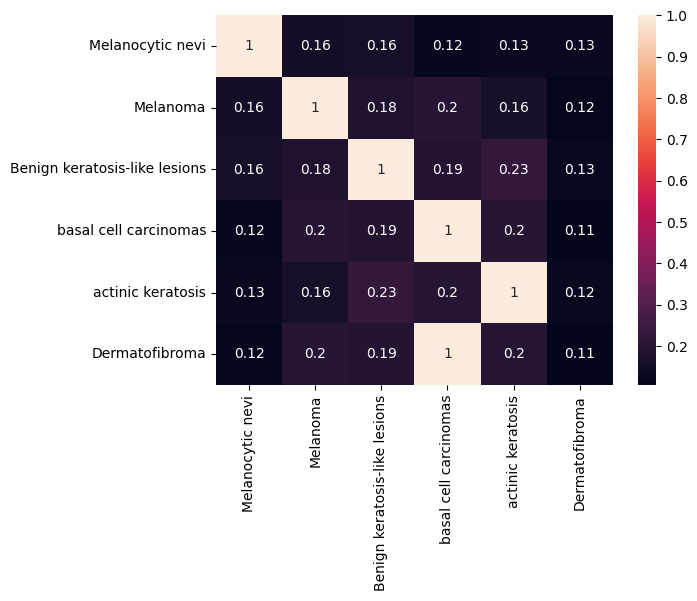

In [264]:
##heatmap
import seaborn as sns
sns.heatmap(simil, annot=True)

# COSINE SIMILARITIES COMPUTATION

In [265]:
# TODO: compute the TF-IDF of A, B and C and the cosine similarities of all possibilities
###TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', lowercase=False, analyzer=lambda x: x)
tf_idf = vectorizer.fit_transform(data_subset["Description_clean"]).toarray()
token = vectorizer.get_feature_names_out()
idf = pd.DataFrame(data = tf_idf, columns=token, index=data_subset.index)

from sklearn.metrics import pairwise
cos = pd.DataFrame(pairwise.cosine_similarity(idf), columns=data_subset.index, index=data_subset.index)

/home/annemocoeur/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [246]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Melanocytic nevi to Dermatofibroma
Columns: 716 entries, abdomen to zyclara
dtypes: float64(716)
memory usage: 33.8+ KB


<Axes: xlabel='Disease', ylabel='Disease'>

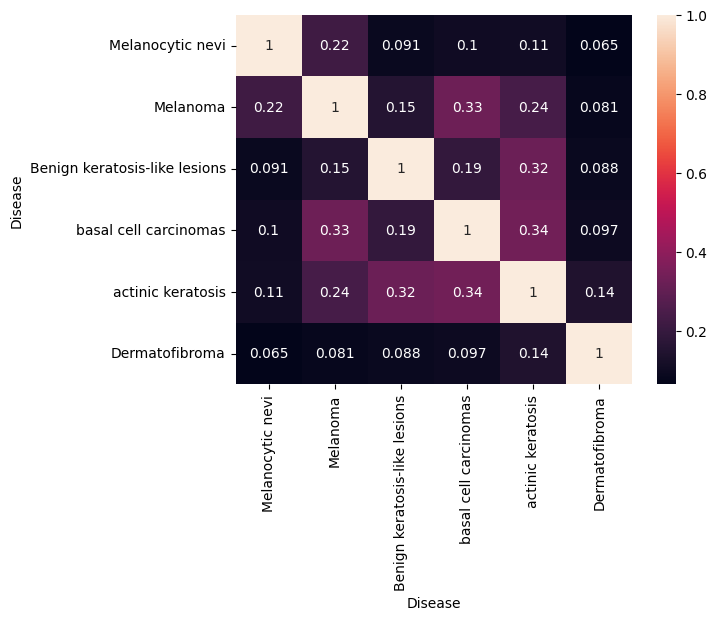

In [266]:
##heatmap
import seaborn as sns
sns.heatmap(cos, annot=True)

# PCA on TD-IDF

In [277]:
##write idf
idf.to_csv("TD_IDF_data.csv")
##data_pca
data_pca = pd.read_csv("TD_IDF_data.csv", index_col=0)
data_pca

,abdomen,able,abnormal,abnormality,accord,account,accumulation,actinic,actual,acutaneousfibrous,...,woman,work,workup,worry,would,wound,year,young,youth,zyclara
Disease,,,,,,,,,,,,,,,,,,,,,
Melanocytic nevi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Melanoma,0.029013,0.029013,0.000000,0.087038,0.029013,0.029013,0.000000,0.000000,0.000000,0.000000,...,0.034424,0.000000,0.029013,0.029013,0.029013,0.000000,0.040172,0.051636,0.029013,0.000000
Benign keratosis-like lesions,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018844,0.000000,0.000000
basal cell carcinomas,0.000000,0.000000,0.020229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.049338,0.085393,0.014635,0.000000,0.000000
actinic keratosis,0.000000,0.000000,0.082798,0.000000,0.000000,0.000000,0.050486,0.151457,0.050486,0.000000,...,0.029951,0.151457,0.000000,0.000000,0.000000,0.000000,0.034952,0.029951,0.000000,0.050486
Dermatofibroma,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057733,...,0.034251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [269]:
##run a PCA
### STRIP_START ###
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

In [280]:
# TODO: Perform PCA and keep only two dimensions
### STRIP_START ###
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(data_pca)
explained_variance = pca.explained_variance_ratio_
explained_variance
### STRIP_END ###

array([0.24545606, 0.2393926 ])

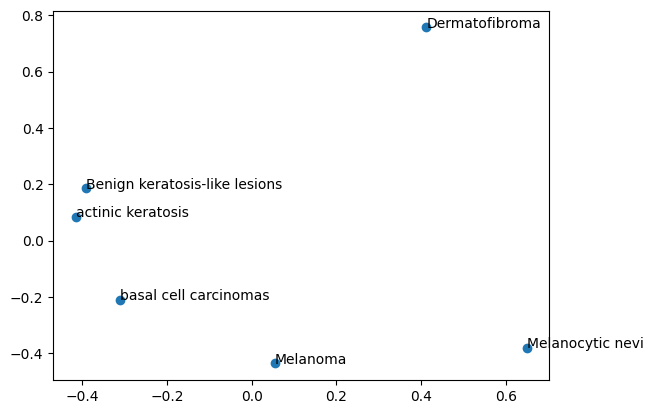

In [281]:
# TODO: plot your results!
### STRIP_START ###
plt.scatter(X_pca[:,0],X_pca[:,1])

for i, txt in enumerate(data_pca.index):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]))